# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')

from ppn2v.unet import UNet

from ppn2v.pn2v import utils
from ppn2v.pn2v import histNoiseModel
from ppn2v.pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from  https://zenodo.org/record/5156937/files/Mouse%20actin.zip?download=1. Here we show the pipeline for Mouse actin dataset. Save the dataset at an appropriate location. For us, the path is data folder which exists at `../../../`. For Mouse actin, the data to be denoised is named ```sample_attempt2.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse actin/'):
    os.mkdir('../../../data/Mouse actin/')

zipPath="../../../data/Mouse actin/Mouse_actin.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://zenodo.org/record/5156937/files/Mouse%20actin.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse actin/")


### Load Data
#### Check ```filename``` and specify the ```dataName```  

In [3]:
path='../../../data/Mouse actin/'
fileName='sample_attempt2.tif'
dataName='mouseactin' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse actin` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.2920825034379959+-(2SEM)0.057399499177572255      
Epoch 1 finished      
avg. loss: 0.2878671884536743+-(2SEM)0.10980753978484738      
Epoch 2 finished      
avg. loss: 0.30849245861172675+-(2SEM)0.11821762812913193      
Epoch 3 finished      
avg. loss: 0.35477659553289415+-(2SEM)0.10712717204479821      
Epoch 4 finished      
avg. loss: 0.257688469812274+-(2SEM)0.11007939043243979      
Epoch 5 finished      
avg. loss: 0.23467098474502562+-(2SEM)0.09546888551127745      
Epoch 6 finished      
avg. loss: 0.3127043072134256+-(2SEM)0.09368685115155484      
Epoch 7 finished      
avg. loss: 0.31192047633230685+-(2SEM)0.11535699512910422      
Epoch 8 finished      
avg. loss: 0.22461928017437457+-(2SEM)0.09152866625857953      
Epoch 9 finished      
avg. loss: 0.30098109133541584+-(2SEM)0.12626398466176805      
Epoch 10 finished      
avg. loss: 0.27426380701363084+-(2SEM)0.12030000798934981      
Epoch 11 finished      
avg. loss: 0.299126866

Epoch 90 finished      
avg. loss: 0.3890620943158865+-(2SEM)0.1343610607012517      
Epoch 91 finished      
avg. loss: 0.31665920503437517+-(2SEM)0.09020683554539932      
Epoch 92 finished      
avg. loss: 0.3887181896716356+-(2SEM)0.12988060914940158      
Epoch 93 finished      
avg. loss: 0.26631355471909046+-(2SEM)0.09508495373118797      
Epoch 94 finished      
avg. loss: 0.23994159363210202+-(2SEM)0.06777578074938113      
Epoch 95 finished      
avg. loss: 0.25135463029146193+-(2SEM)0.09367588302283357      
Epoch 96 finished      
avg. loss: 0.2287766721099615+-(2SEM)0.09188581791006804      
Epoch 97 finished      
avg. loss: 0.28038817532360555+-(2SEM)0.08914266308406359      
Epoch 98 finished      
avg. loss: 0.33052920624613763+-(2SEM)0.14039765407425764      
Epoch 99 finished      
avg. loss: 0.3380734477192163+-(2SEM)0.11216952122798225      
Epoch 100 finished      
avg. loss: 0.33601260669529437+-(2SEM)0.12223110044728848      
Epoch 101 finished      
avg. loss: 

Epoch 178 finished      
avg. loss: 0.22737270966172218+-(2SEM)0.09775649704524483      
Epoch 179 finished      
avg. loss: 0.29169797264039515+-(2SEM)0.11421672284328993      
Epoch 180 finished      
avg. loss: 0.23873362243175505+-(2SEM)0.08504017359932202      
Epoch 181 finished      
avg. loss: 0.4069471925497055+-(2SEM)0.1339355859301781      
Epoch 182 finished      
avg. loss: 0.3227666519582272+-(2SEM)0.12077639318318303      
Epoch 183 finished      
avg. loss: 0.3207390196621418+-(2SEM)0.1327703915775703      
Epoch 184 finished      
avg. loss: 0.1902143009006977+-(2SEM)0.07386544371515069      
Epoch 185 finished      
avg. loss: 0.2632747642695904+-(2SEM)0.0990922401124441      
Epoch 186 finished      
avg. loss: 0.24987249560654162+-(2SEM)0.11934559966926668      
Epoch   186: reducing learning rate of group 0 to 6.1035e-08.
Epoch 187 finished      
avg. loss: 0.3163112986832857+-(2SEM)0.13950997655975148      
Epoch 188 finished      
avg. loss: 0.3290203619748354+-(

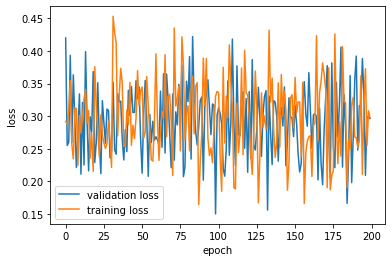

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()